<img src="Firefly Podcast Reviews 94193.jpg" width="450" height="450">
<p style="font-family: San Francisco; font-size:2.75em;color:#0056D2; font-style:bold"> <br>Inferential Statistical Analysis of the Podcast Reviews</p>
<br>

<a id="0"></a>
 ### [Table of Contents](0)
1. [Project Introduction](#1)      
1. [Preparation and Initial Inspection](#2)
    1. [Observations](#3) 
1. [Data Preparation and Cleaning](#4) 
1. [Exploratory Analysis](#5)     
    1. [Podcasts by Rating](#6) 
    1. [Sentiment Analysis](#7)
    1. [Statistical inference](#8)
1. [Summary and Suggestions](#12)     
    
    

#### [Notebook by Mažvydas Brikas](https://www.linkedin.com/in/mazvydas-brikas/)      

<a id="1"></a> 
# 1. Project Introduction

The main objective of this project is to analyze the Podcast Reviews Dataset.
</p><br>Dataset Information:

2 million podcast reviews for 100k podcasts, updated monthly. This dataset is intended to aid in analysis of text feedback and review data.

</p><br>Requirements:

- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, and conducting z or t-tests for these hypotheses.
- Create a dashboard using Looker Studio or another BI tool, e.g. Tableau with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.
 

</p><br>Objectives:

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice creating dashboards.
- Practice reading data, performing queries, and filtering data using SQL and Pandas.
 
<br>

You can download dataset from [Kaggle](https://www.kaggle.com/datasets/thoughtvector/podcastreviews/versions/28).

Looker Studio [Podcast Reviews Dashboard](https://lookerstudio.google.com/reporting/d3b50089-c400-4d61-9f94-29c31c4b2fd4).

<a id="2"></a> 
# 2. Preparation and Initial Inspection

In [225]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import geopandas as gpd
from shapely.geometry import Point
from textblob import TextBlob
import plotly.express as px
%run my_functions.ipynb
from scipy import stats

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Load each table
runs_df = load_table("runs")
podcasts_df = load_table("podcasts")
categories_df = load_table("categories")
reviews_df = load_table("reviews")

# Set the default color palette for Seaborn
sns.set_palette('bright')

<a id="3"></a> 
## 2.1 Observations

Dataset from 5 tables
* categories
* podcasts
* reviews
* runs

In [226]:
categories_df.head()

,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design


In [227]:
podcasts_df.head()

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift


In [228]:
reviews_df.head()

,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00


In [229]:
runs_df.head()

,run_at,max_rowid,reviews_added
0,2021-05-10 02:53:00,3266481,1215223
1,2021-06-06 21:34:36,3300773,13139
2,2021-07-02 18:04:55,3329699,11561
3,2021-08-01 17:54:42,3360315,11855
4,2021-09-02 18:00:30,3390165,11714


* categories = podcast_id |	category 
* podcasts = podcast_id | itunes_id | slug | itunes_url | title 
* reviews = podcast_id | title | content | rating |	author_id |	created_at
* runs = run_at | max_rowid | reviews_added

In [230]:
# Data Overview, Missing Values, and Descriptive Statistics
print("Shape of the DataFrame:", reviews_df.shape)
print("Missing values in each column:")
print(reviews_df.isnull().sum())
print("Descriptive Statistics:")
print(reviews_df.describe(include='all'))

Shape of the DataFrame: (2067529, 6)
Missing values in each column:
podcast_id    0
title         0
content       0
rating        0
author_id     0
created_at    0
dtype: int64
Descriptive Statistics:
                              podcast_id          title               content  \
count                            2067529        2067529               2067529   
unique                            111544        1138688               2049707   
top     bf5bf76d5b6ffbf9a31bba4480383b7f  Great podcast  I love this podcast!   
freq                               33104          14236                   179   
mean                                 NaN            NaN                   NaN   
std                                  NaN            NaN                   NaN   
min                                  NaN            NaN                   NaN   
25%                                  NaN            NaN                   NaN   
50%                                  NaN            NaN               

<a id="4"></a> 
# 3. Data preparation and cleaning
Feature corrections, merges, duplicates.

In [231]:
# Renaming 'title' column in podcasts_df to 'podcast_name'
podcasts_df.rename(columns={'title': 'podcast_name'}, inplace=True)

# Merging the reviews and podcasts dataframes on podcast_id
merged_df = pd.merge(reviews_df, podcasts_df, on='podcast_id')

# Merging religion/spirituality categories
categories_df['simplified_category'] = categories_df['category'].apply(simplify_category)

# Merging merged (podcast and reviews) with ctegories df on "podcast_id"
merged_df = pd.merge(merged_df, categories_df, on='podcast_id')

# Removing duplicates
merged_df = merged_df.drop_duplicates(subset='title', keep='first')

Sentiment analysis:

Calculating the sentiment polarity of each review text using TextBlob's sentiment analysis capabilities and storing the result in a new column named 'sentiment'. This allows to analyze and visualize the sentiment distribution of the review content.

In [232]:
# Performing Sentiment Analysis on review content
merged_df['sentiment'] = merged_df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [233]:
merged_df.head(5)

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_name,category,simplified_category,sentiment
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts,arts,0.350000
3,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts,arts,0.328423
6,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00,160904630,ted-talks-daily,https://podcasts.apple.com/us/podcast/ted-talk...,TED Talks Daily,arts,arts,-0.008333
10,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00,160904630,ted-talks-daily,https://podcasts.apple.com/us/podcast/ted-talk...,TED Talks Daily,arts,arts,0.527778
14,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00,160904630,ted-talks-daily,https://podcasts.apple.com/us/podcast/ted-talk...,TED Talks Daily,arts,arts,0.600000


In [234]:
# Data Overview, Missing Values, and Descriptive Statistics
print("Shape of the DataFrame:", merged_df.shape)
print("Missing values in each column:")
print(merged_df.isnull().sum())
print("Descriptive Statistics:")
print(merged_df.describe(include='all'))

Shape of the DataFrame: (1125831, 13)
Missing values in each column:
podcast_id             0
title                  0
content                0
rating                 0
author_id              0
created_at             0
itunes_id              0
slug                   0
itunes_url             0
podcast_name           0
category               0
simplified_category    0
sentiment              0
dtype: int64
Descriptive Statistics:
                              podcast_id                title  \
count                            1125831              1125831   
unique                             86817              1125831   
top     bf5bf76d5b6ffbf9a31bba4480383b7f  really interesting!   
freq                               13241                    1   
mean                                 NaN                  NaN   
std                                  NaN                  NaN   
min                                  NaN                  NaN   
25%                                  NaN         

CSV export for GDS Dashboard:

Used this data frame for looker studio dashboard.

In [ ]:
# Main dataframe for GDS
export_df = merged_df.drop(columns=['title', 'content','author_id','created_at','itunes_id','itunes_url','podcast_name', 'category' ])
export_df.to_csv('merged_df10.csv', index=False)

<a id="5"></a> 
# 4. Exploratory Analysis

<a id="6"></a> 
## 4.1  Podcasts by Rating

In [235]:
print(merged_df['rating'].describe())

count    1.125831e+06
mean     4.558585e+00
std      1.121304e+00
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


* Mean (Average): The average rating is approximately 4.56 on a scale from 1 to 5. This high average suggests that listeners generally rate podcasts favorably.

* Standard Deviation: The standard deviation is about 1.12, which indicates some variability in the ratings. However, given the scale of ratings (1 to 5), this level of variation is relatively moderate, suggesting that while there are differing opinions, a consensus towards higher ratings exists.

* Min: The minimum rating is 1, indicating that there are some highly negative reviews. Despite the overall high average rating, this shows that not all feedback is positive.

* 25th Percentile (Q1): 75% of the ratings are at the maximum of 5, and the 25th percentile is also 5. This indicates a significant concentration of high ratings and suggests that a vast majority of reviewers rate podcasts very positively.

* 50th Percentile (Median): The median rating is 5, reinforcing the observation that the majority of reviews are very positive. Given that the median is at the maximum rating, it's clear that more than half of the ratings are at this level.

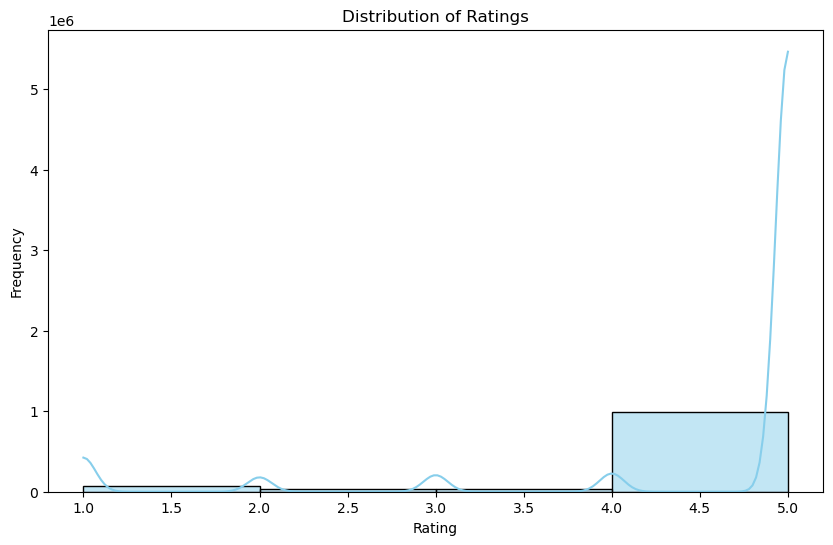

In [236]:
# Visualization of Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], bins=4, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

* Most of the ratings are between 4.5 and 5

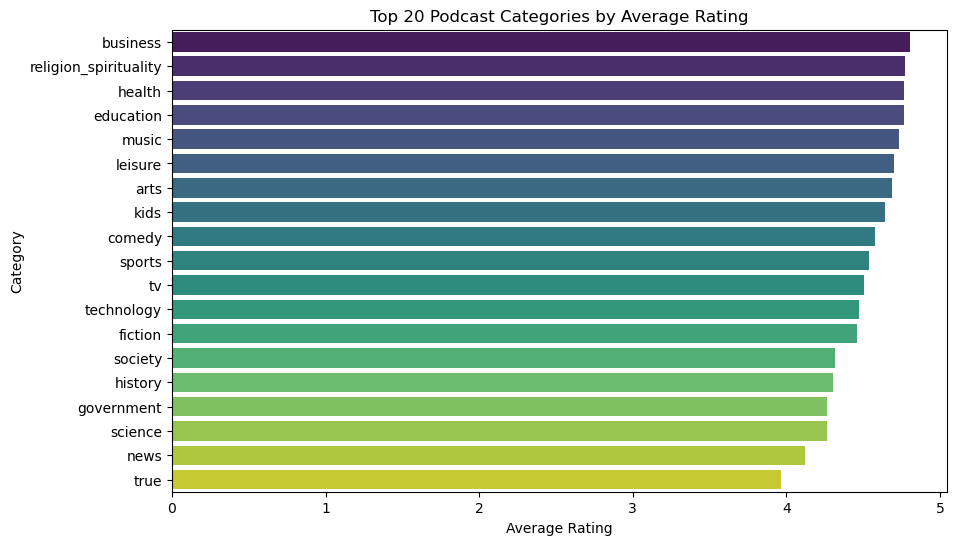

      simplified_category    rating
1                business  4.804362
12  religion_spirituality  4.770935
6                  health  4.766493
3               education  4.762747
10                  music  4.732568
9                 leisure  4.699649
0                    arts  4.684487
8                    kids  4.644778
2                  comedy  4.574662
15                 sports  4.540267
18                     tv  4.507451
16             technology  4.471461
4                 fiction  4.456168
14                society  4.319005
7                 history  4.303256
5              government  4.266760
13                science  4.264628
11                   news  4.123081
17                   true  3.965490


In [239]:
# Group by simplified_category and calculate the average rating
category_ratings = merged_df.groupby('simplified_category')['rating'].mean().reset_index()

# Sort the categories by average rating and select the top 20
top_categories = category_ratings.sort_values(by='rating', ascending=False).head(20)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='simplified_category', data=top_categories, palette='viridis')
plt.title('Top 20 Podcast Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

print(top_categories)

#### Highest rated categories are:
* Business
* Religion/spirituality 
* Health

Text(0.5, 1.0, 'Number of Ratings for Top 20 Podcast Categories')

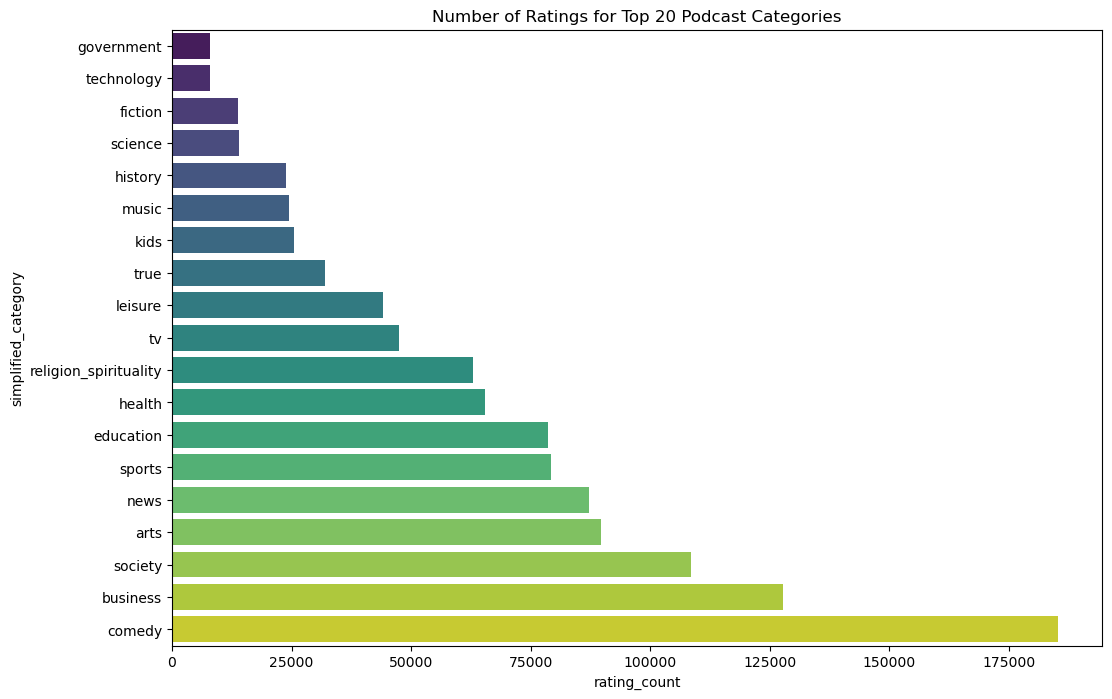

In [240]:
category_ratings = merged_df.groupby('simplified_category').agg(
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean'),
    rating_count=pd.NamedAgg(column='rating', aggfunc='count')
).reset_index()
threshold = 50  # Minimum number of ratings to consider
top_categories = category_ratings[category_ratings['rating_count'] > threshold].sort_values(by='average_rating', ascending=False).head(20)

# Visualization of Rating Counts (sorted ascendingly)
top_categories_sorted_by_rating_count = top_categories.sort_values(by='rating_count', ascending=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='simplified_category', data=top_categories_sorted_by_rating_count, palette='viridis')
plt.title('Number of Ratings for Top 20 Podcast Categories')

#### Most rated categories are:
* Comedy
* Business
* Society

In [241]:
# Group by simplified_category and count the number of ratings
category_rating_counts = merged_df.groupby('simplified_category')['rating'].count().reset_index() 

# Sort the categories by the count of ratings
sorted_category_counts = category_rating_counts.sort_values(by='rating', ascending=False) 
print(sorted_category_counts)

      simplified_category  rating
2                  comedy  185222
1                business  127736
14                society  108528
0                    arts   89708
11                   news   87203
15                 sports   79270
3               education   78722
6                  health   65497
12  religion_spirituality   62886
18                     tv   47376
9                 leisure   44215
17                   true   31991
8                    kids   25553
10                  music   24481
7                 history   23805
13                science   13929
4                 fiction   13894
16             technology    7954
5              government    7861


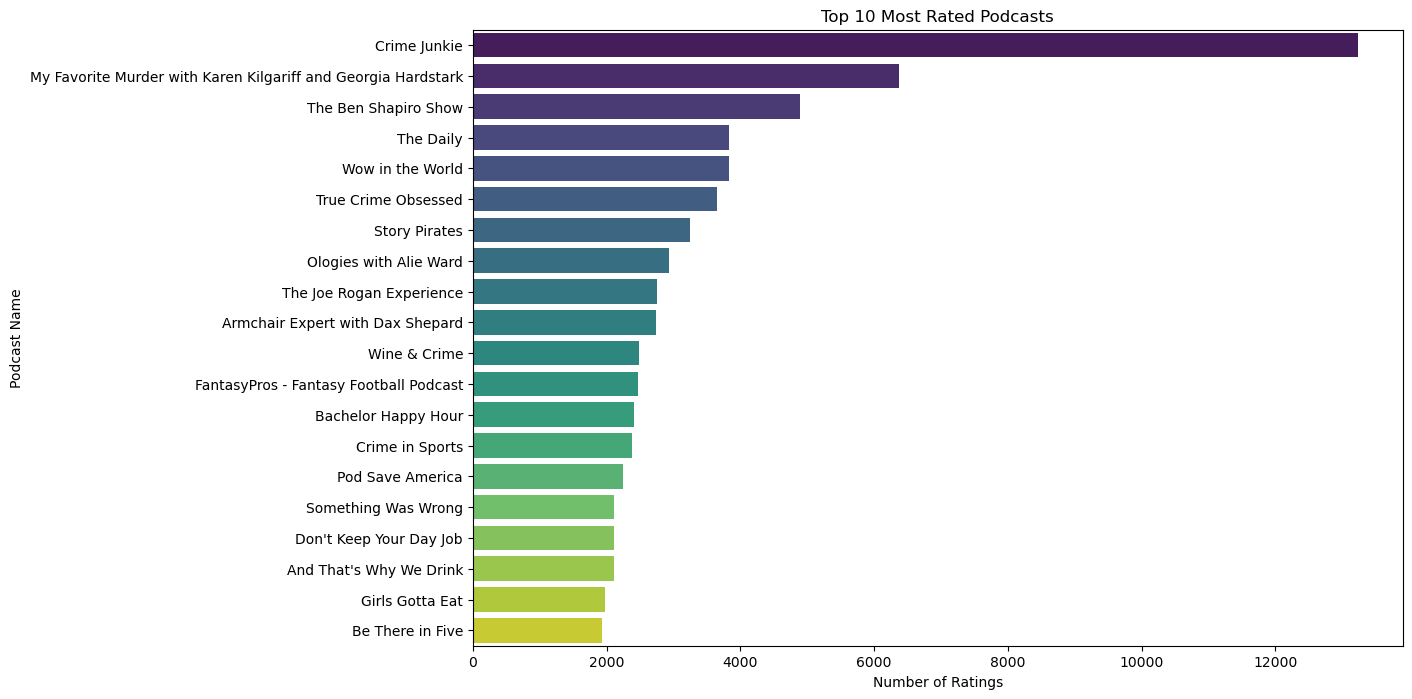

                                            podcast_name  rating
15958                                       Crime Junkie   13241
47578  My Favorite Murder with Karen Kilgariff and Ge...    6377
70878                               The Ben Shapiro Show    4895
71461                                          The Daily    3833
84489                                   Wow in the World    3825
78071                                True Crime Obsessed    3647
66968                                      Story Pirates    3244
50922                             Ologies with Alie Ward    2940
72536                           The Joe Rogan Experience    2754
3582                    Armchair Expert with Dax Shepard    2732
83661                                       Wine & Crime    2484
23965             FantasyPros - Fantasy Football Podcast    2463
5106                                 Bachelor Happy Hour    2410
15990                                    Crime in Sports    2385
54404                    

In [242]:
# Aggregating to find the count of ratings for each podcast
podcast_rating_counts = merged_df.groupby('podcast_name')['rating'].count().reset_index().sort_values(by='rating', ascending=False)

# Getting the top podcasts based on the number of ratings
top_rated_podcasts = podcast_rating_counts.head(20)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='podcast_name', data=top_rated_podcasts, palette='viridis')
plt.title('Top 10 Most Rated Podcasts')
plt.xlabel('Number of Ratings')
plt.ylabel('Podcast Name')
plt.show()

print(top_rated_podcasts)

<a id="7"></a> 
## 4.2 Sentiment Analysis

### Sentiment analysis:

Calculating the sentiment polarity of each review text using TextBlob's sentiment analysis capabilities and storing the result in a new column named 'sentiment'. This allows to analyze and visualize the sentiment distribution of the review content.

In [244]:
print(merged_df['sentiment'].describe())

count    1.125831e+06
mean     2.842293e-01
std      2.605836e-01
min     -1.000000e+00
25%      1.227273e-01
50%      2.812500e-01
75%      4.375000e-01
max      1.000000e+00
Name: sentiment, dtype: float64


* Mean (Average): The mean sentiment score is approximately 0.284, suggesting that on average, the sentiment in podcast reviews is slightly positive.

* The distribution of sentiment scores suggests a broad range of reactions in podcast reviews, from extremely negative to extremely positive.

* The closeness of the mean and median suggests a relatively symmetrical distribution of sentiment scores, though the presence of outliers and the broad range covered by the standard deviation highlight the diversity in listener opinions.

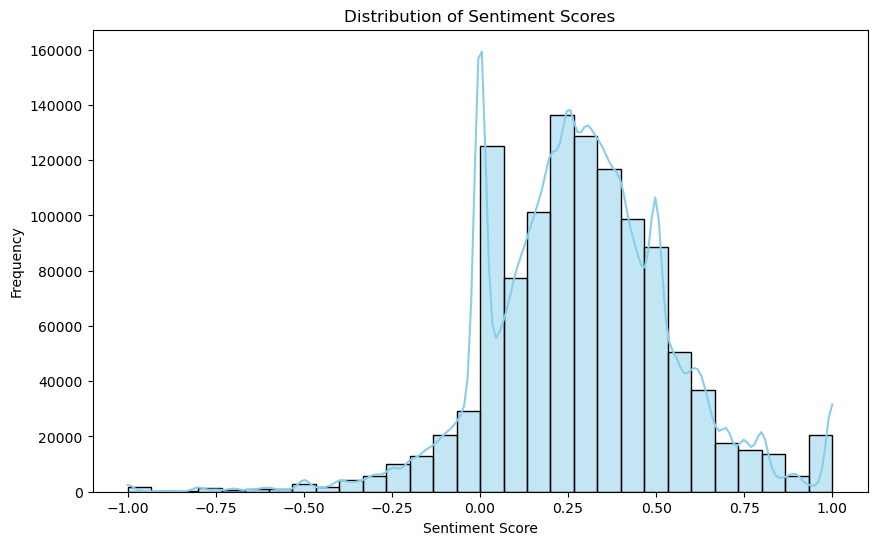

In [245]:
# Visualization of Sentiments Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

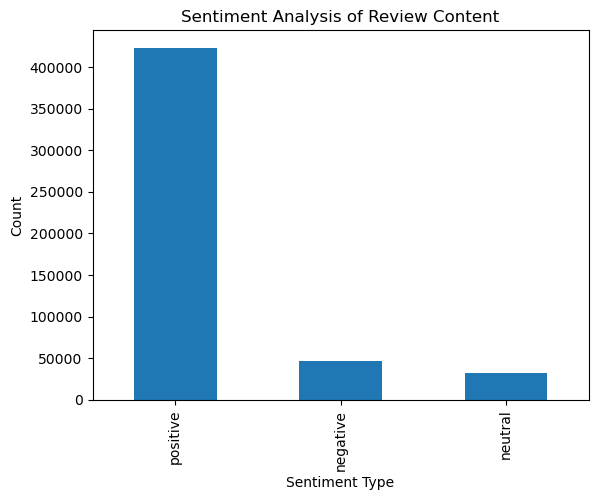

positive    422993
negative     47051
neutral      31724
Name: sentiment_type, dtype: int64


In [201]:
# Classifying sentiments as positive, negative, or neutral
reviews_df['sentiment_type'] = merged_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Getting the count of each type of sentiment
sentiment_counts = reviews_df['sentiment_type'].value_counts()

# Visualization
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis of Review Content')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

print(sentiment_counts)

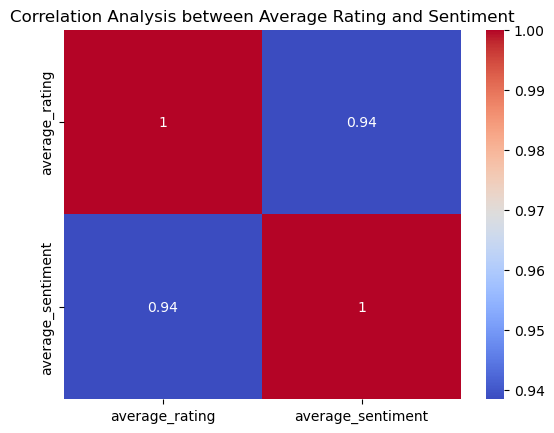

In [251]:
# Grouping by simplified_category to calculate average rating and average sentiment
category_analysis = merged_df.groupby('simplified_category').agg(
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean'),
    average_sentiment=pd.NamedAgg(column='sentiment', aggfunc='mean')
).reset_index()

# Correlation Analysis
correlation_matrix = category_analysis[['average_rating', 'average_sentiment']].corr()

# Visualization of the Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis between Average Rating and Sentiment')
plt.show()

Analysis indicates a strong positive correlation between the average rating and average sentiment across different podcast categories, as evidenced by a correlation coefficient 0.938

This high correlation coefficient suggests that as average ratings for podcast categories increase, so does the average sentiment, implying a strong association between how positively listeners rate podcasts and the positive sentiment expressed in their reviews.

In [248]:
category_averages = merged_df.groupby('simplified_category').agg(
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean'),
    average_sentiment=pd.NamedAgg(column='sentiment', aggfunc='mean')
).reset_index()

# Assessing the correlation
correlation, p_value = pearsonr(category_averages['average_rating'], category_averages['average_sentiment'])
print(f"Correlation coefficient: {correlation}, P-value: {p_value}")

# Creating interactive Plotly scatter plot
fig = px.scatter(category_analysis, x='average_rating', y='average_sentiment', 
                 hover_data=['simplified_category'], color='simplified_category',
                 title='Interactive Plot: Relationship Between Average Rating and Average Sentiment in Each Category')
fig.show()

Correlation coefficient: 0.9384837412677942, P-value: 2.849057478881174e-09


P-value is significantly less than the common alpha level of 0.05, which indicates that the observed correlation is statistically significant. This means there's a very low probability that the strong relationship between average ratings and sentiment scores across categories occurred by chance.

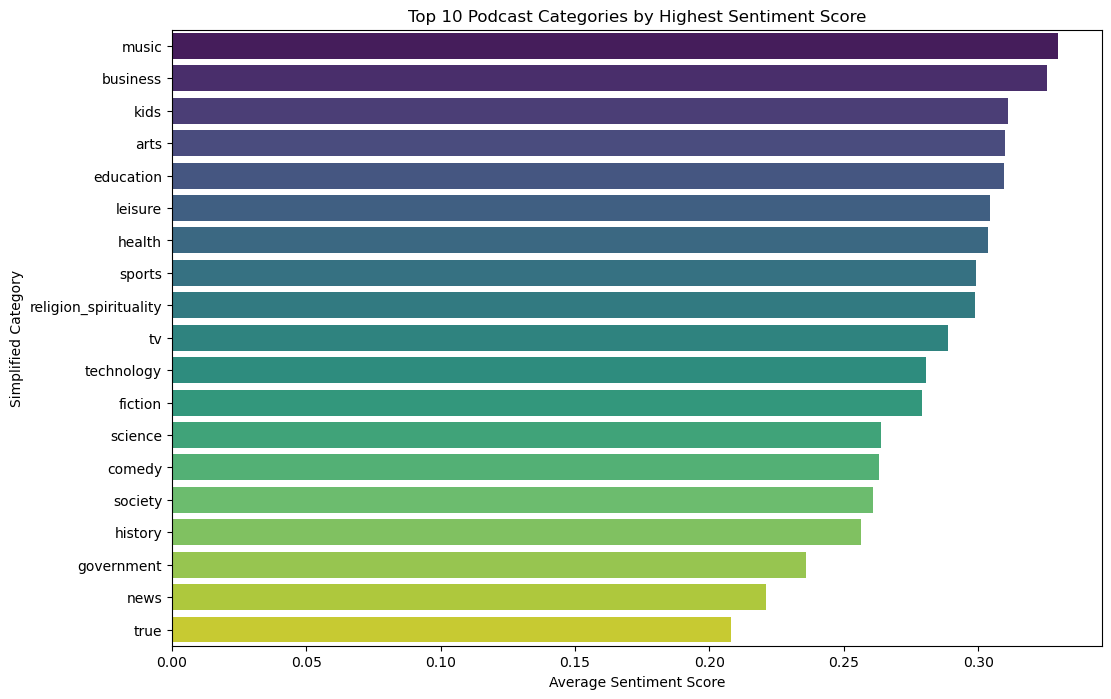

      simplified_category  sentiment
10                  music   0.329541
1                business   0.325495
8                    kids   0.310938
0                    arts   0.309957
3               education   0.309550
9                 leisure   0.304244
6                  health   0.303521
15                 sports   0.298991
12  religion_spirituality   0.298832
18                     tv   0.288928
16             technology   0.280598
4                 fiction   0.279040
13                science   0.263905
2                  comedy   0.263096
14                society   0.260788
7                 history   0.256312
5              government   0.235882
11                   news   0.221116
17                   true   0.208181


In [247]:
# Grouping by simplified_category and calculating average sentiment
category_sentiment = merged_df.groupby('simplified_category')['sentiment'].mean().reset_index()

# Sorting to get top 10 categories with highest sentiment scores
top_categories_sentiment = category_sentiment.sort_values(by='sentiment', ascending=False).head(50)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='simplified_category', data=top_categories_sentiment, palette='viridis')
plt.title('Top 10 Podcast Categories by Highest Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Simplified Category')
plt.show()

print(top_categories_sentiment)

### Outliers

In [249]:
sentiment_z_scores = np.abs(stats.zscore(merged_df['sentiment']))
outliers = merged_df[sentiment_z_scores > 3]

print(f"Detected {len(outliers)} outliers using Z-score method.")
print(outliers['sentiment'].describe())

Detected 8501 outliers using Z-score method.
count    8501.000000
mean       -0.694195
std         0.180389
min        -1.000000
25%        -0.800000
50%        -0.650000
75%        -0.500000
max        -0.497917
Name: sentiment, dtype: float64


The sentiment scores of outliers range from -1 to approximately -0.498, with a mean sentiment score of approximately -0.694. This indicates a skew towards negative sentiment among the outliers. The fact that these outliers have such consistently low sentiment scores suggests that they are reviews expressing significant dissatisfaction or negative experiences.

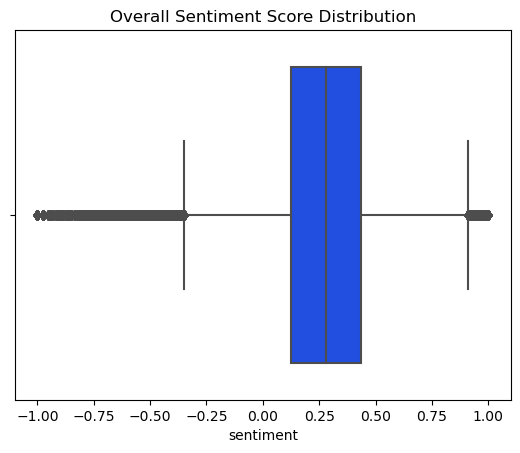

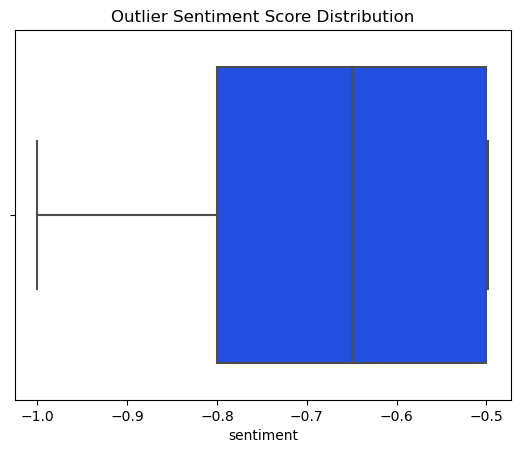

In [252]:
# Box plot for overall data
sns.boxplot(x=merged_df['sentiment'])
plt.title('Overall Sentiment Score Distribution')
plt.show()

# Box plot for outliers
sns.boxplot(x=outliers['sentiment'])
plt.title('Outlier Sentiment Score Distribution')
plt.show()

### Sample Review Analysis

In [220]:
for review in outliers['content'].sample(5):
    print(review, "\n")

This is a hate podcast they are mad they are the one of the lowest viewed in wrestling podcast snowflake 

This pod makes me want to up my swearing game, scream into a pillow, take anger management classes, learn to meditate, or go hit someone. Maybe all?  #FlorMingos 

Lovett,  that interview was terrible. 

these stories are absolutely terrifying! they make my heart race, and i almost can’t finish them! not to mention the speaker narrates them so well! 

Premium version does not work.  Difficult to use (download, keep track of lessons). 



The sample reviews vary widely, from extremely negative feedback and expressions of strong emotional reactions to specific criticisms about podcast content or technical issues. This variety suggests that while these are outliers in terms of sentiment score, they represent genuine listener reactions rather than data errors or anomalies that could be disregarded without further consideration.

 <a id="8"></a> 
## 4.3 Statistical inference

### t-test

### Defining the Target Population:

* Objective: To understand the sentiment towards business and comedy podcasts.

* Target Population: All podcast listeners of business and comedy genres from this data set. 

### Hypotheses:

* H0: There is no difference in average sentiment scores between business and comedy podcasts.
* H1: There is a significant difference in average sentiment scores between business and comedy podcasts.

### Significance Level:

*  0.05, indicating a 5% risk of concluding that a difference exists when there is no actual difference.

In [253]:
# Filter the DataFrame for "business" and "comedy" genres
business_sentiment = merged_df[merged_df['simplified_category'] == 'business']['sentiment']
comedy_sentiment = merged_df[merged_df['simplified_category'] == 'comedy']['sentiment']

# Perform t-test
t_stat, p_value = stats.ttest_ind(business_sentiment, comedy_sentiment)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average listener sentiment between 'business' and 'comedy' podcast genres.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average listener sentiment between 'business' and 'comedy' podcast genres.")


T-Statistic: 66.47535347460264
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in average listener sentiment between 'business' and 'comedy' podcast genres.


* T-Statistic of 66.475 suggests a substantial difference in the mean sentiment scores of business and comedy podcasts. This is a strong indicator that the observed difference is not due to random chance.

* P-Value: 0.0 indicates that the likelihood of the observed difference (or more extreme) occurring by random chance is virtually nonexistent. 

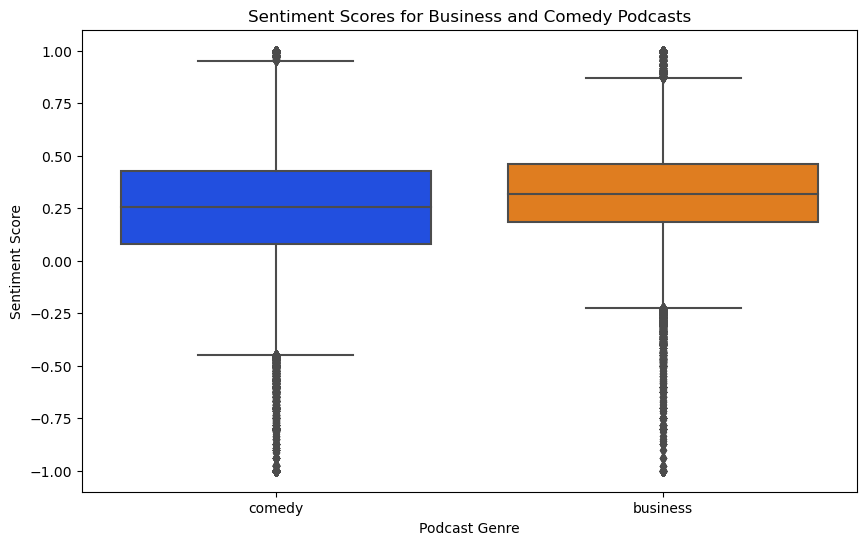

In [254]:
# Filter the DataFrame for "business" and "comedy" genres only
filtered_df = merged_df[merged_df['simplified_category'].isin(['business', 'comedy'])]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='simplified_category', y='sentiment', data=filtered_df)
plt.title('Sentiment Scores for Business and Comedy Podcasts')
plt.xlabel('Podcast Genre')
plt.ylabel('Sentiment Score')
plt.show()

In [255]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(business_sentiment, comedy_sentiment, equal_var=False)
mean_diff = np.mean(business_sentiment) - np.mean(comedy_sentiment)

# Calculate the degrees of freedom for Welch's t-test (unequal variances)
df = len(business_sentiment) + len(comedy_sentiment) - 2

# Calculate the standard error of the difference in means
std_err_diff = np.sqrt(np.var(business_sentiment, ddof=1)/len(business_sentiment) + np.var(comedy_sentiment, ddof=1)/len(comedy_sentiment))

# Determine the critical value for a 95% confidence interval
critical_value = stats.t.ppf(0.975, df)  # 0.975 because 2-tailed, and we want the 95% CI

# Calculate the margin of error
margin_of_error = critical_value * std_err_diff

# Calculate the confidence interval
conf_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

print(f"Mean difference: {mean_diff}")
print(f"95% confidence interval for the mean difference: {conf_interval}")


Mean difference: 0.06239929204109995
95% confidence interval for the mean difference: (0.06061388292139692, 0.06418470116080299)


* with 95% confidence, the true difference in mean sentiment scores between business and comedy podcasts lies within this range. The interval is quite narrow, which suggests a high level of precision in your estimate of the mean difference.
* The confidence interval does not contain 0, which strongly supports the conclusion that there is a significant difference between the two genres in terms of sentiment scores.
* Given that the entire interval is above 0, you have evidence to suggest that business podcasts are viewed more positively than comedy podcasts, according to the sentiment analysis of reviews in your dataset.

In [ ]:
### Defining the Target Population:

* Objective: To understand the sentiment towards technology podcast comparing to overall average sentiment.

* Target Population: All podcast listeners from this data set. 

### Hypotheses:

* H0: There is no difference in average sentiment and technology podcasts.
* H1: There is a significant difference in average sentiment and technology podcasts.

### Significance Level:

*  0.05, indicating a 5% risk of concluding that a difference exists when there is no actual difference.

In [256]:
tech_sentiments = merged_df[merged_df['simplified_category'] == 'technology']['sentiment']
overall_mean_sentiment = merged_df['sentiment'].mean()
t_stat, p_value = stats.ttest_1samp(tech_sentiments, overall_mean_sentiment)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sentiment scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sentiment scores.")

t-statistic: -1.237460146594469, p-value: 0.21595283468791238
Fail to reject the null hypothesis: No significant difference in sentiment scores.


* T-Statistic: The negative t-statistic indicates that the mean sentiment score for technology podcasts is lower than the overall mean sentiment score across all podcasts. However, the magnitude of this statistic is relatively small, suggesting that the difference might not be very large.

* P-Value: With a p-value of approximately 0.216, which is greater than the chosen significance level (0.05), there is not enough evidence to reject the null hypothesis. This suggests that the average sentiment score for technology podcasts is not significantly different from the overall average sentiment score across all podcast categories.

<a id="12"></a> 
# 5. Summary and Suggestions

**Summary:**

This project aimed to explore Podcast Reviews Dataset to understand listener sentiment and preferences across different podcast genres. Key findings:

1. **General Sentiment and Ratings:**
   - The analysis revealed that podcast reviews are generally positive, with an average sentiment score of 0.284 and an average rating of 4.56. This indicates that listeners tend to enjoy the content they choose to review, with a skew towards higher ratings.
   - Business and religion/spirituality emerged as the highest-rated categories, suggesting a strong listener interest in these genres.
   - Business podcasts showing particularly high sentiment scores, implying that content in these categories resonates well with their audiences.
   <br><br>
2. **Strong Correlation Between Ratings and Sentiment:**
   - A significant positive correlation (r = 0.938) between average ratings and sentiment scores across different podcast categories suggests that higher-rated podcasts are also spoken of more positively in reviews.
<br><br>
3. **Sentiment towards business and comedy podcasts:**
   - A t-test comparing sentiment scores between business and comedy podcasts revealed a significant difference, indicating that business podcasts are received more positively than comedy podcasts. The t-statistic was notably high, and the p-value was extremely low (practically zero), strongly suggesting that this finding is not due to chance.
<br><br>
5. **Technology Podcasts Analysis:**
   - A specific analysis of technology podcasts showed no significant difference in sentiment scores compared to the overall average sentiment. This suggests that technology podcasts, as a category, align well with general listener satisfaction levels.
<br><br>
6. **Outlier Analysis:**
   - The identification of 8,501 outliers based on sentiment scores highlighted a subset of reviews with significantly negative sentiment. Analysis of these outliers provided insights into potential areas for improvement, ranging from content-related issues to technical problems with podcast access.
 
<br><br>
**Suggestions:**

1. **Text Analysis:**
   - Perform text analysis on the review content to identify common themes or topics that drive positive or negative sentiment. This could help podcast creators tailor their content more effectively to audience preferences.
<br><br>
2. **Cross-Genre Comparison:**
   - Expand the comparative analysis to include more genres. Are there specific elements of content presentation or topic selection that consistently lead to higher sentiment scores across different genres
<br><br>
3. **Trends:**
   - Examine how sentiment scores and ratings evolve over time. Are there any trends or patterns that correlate with external events or podcast release schedules.
